<a href="https://colab.research.google.com/github/mahmoud25112/Advanced_data_science/blob/main/DS_journey/DS2_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From Scratch

in this notebook we will be examining how linear regression works under the hood. NO sickit learn or tensor flow will be used we will run and make a simple regression model with 1 feature and 1 target.

we will also visualize as we find the best fitting line.

it's more of a learning experince

In [ ]:
# first we import our dataset from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("burnoutminer/heights-and-weights-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/burnoutminer/heights-and-weights-dataset/versions/1


In [ ]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/burnoutminer/heights-and-weights-dataset/versions/1/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
df.isnull().sum()

,0
Index,0
Height(Inches),0
Weight(Pounds),0


In [ ]:
df = df.drop(columns=['Index'])
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [ ]:
x = df['Height(Inches)']
y = df['Weight(Pounds)']

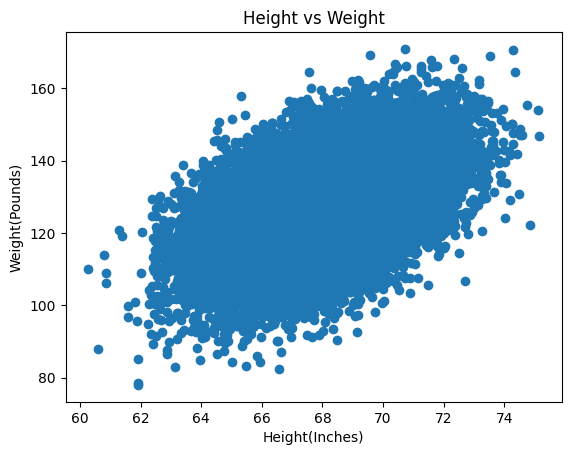

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Height vs Weight')
plt.show()

We confirmed the linear relationship between the height and weight
now we will be defining the loss function which is the MSE

We need to minimze the error betweern the actual points y and the predicted points which are equivelent to m*x+b

in order to achieve this we will use gradient descent by taking the derivative of the loss function in terms of our changing variables m and b
then using the formula =  current_m - Learning rate * (derived loss function)
we subtract the point that increases the gradent or function the most

In [ ]:
def loss_function(m, b, x, y):
    total_error = 0
    for i in range(len(x)):
        total_error += (y[i] - (m * x[i] + b)) ** 2
    return total_error / float(len(x))


This is Mean Squared Error which does the following:


*   subtract each predicted point from the actual point to for each X
*   square it then add it after each iteration
*   we divide the total error or distance from the actual points by the number of points we have to get the mean








The function above can't be differentiated or atleast I don't know how so we will define our own gradient descent function  

In [ ]:
def gradient_descent(m_now, b_now, x, y, L):
  m_gradient = 0
  b_gradient = 0
  for i in range(len(x)):
    m_gradient += -(2/len(x)) * x[i] * (y[i] - (m_now * x[i] + b_now))
    b_gradient += -(2/len(x)) * (y[i] - (m_now * x[i] + b_now))
  m_now = m_now - L * m_gradient
  b_now = b_now - L * b_gradient
  return m_now, b_now


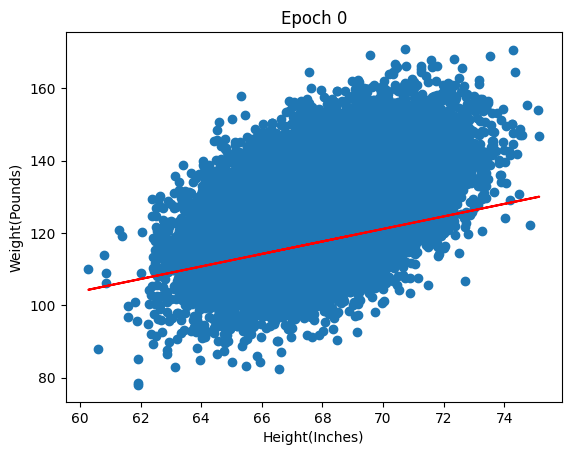

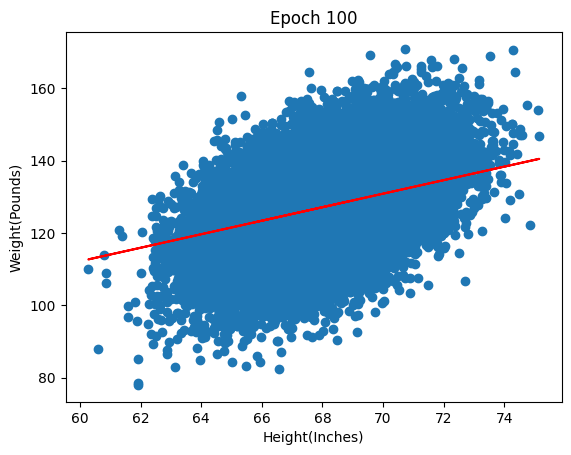

In [ ]:
epochs = 200
Learning_rate = 0.0001
m = 0
b = 0
i=0
for i in range(epochs):
  m, b = gradient_descent(m, b, x, y, Learning_rate)
  if i % 100 == 0:
    plt.scatter(x, y)
    plt.plot(x, m*x + b, color='red')
    plt.xlabel('Height(Inches)')
    plt.ylabel('Weight(Pounds)')
    plt.title(f'Epoch {i}')
    plt.show()

Mean Squared Error: 102.48790963792534


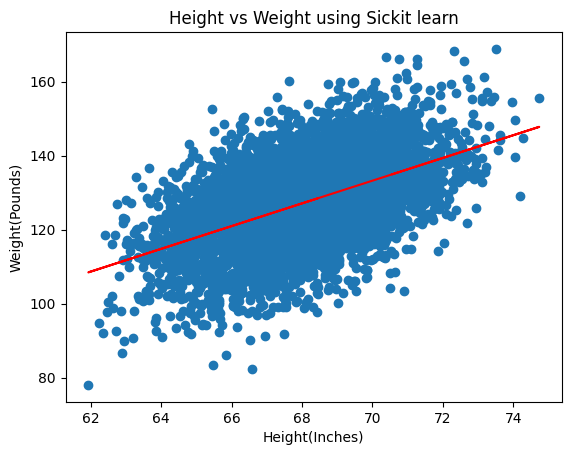

Mean Squared Error: 108.34687704750165


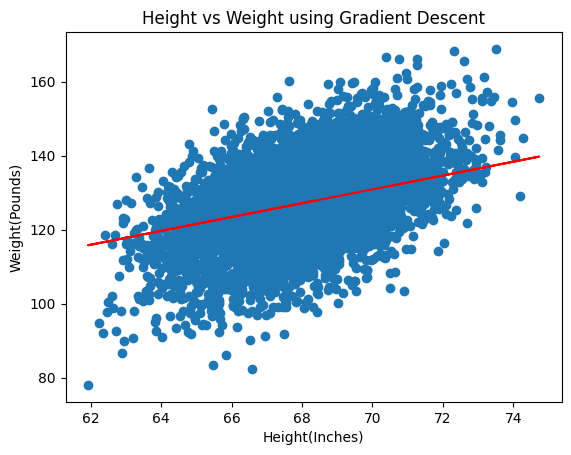

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Height vs Weight using Sickit learn')
plt.show()

m = 0
b = 0

for i in range(epochs):
  m, b = gradient_descent(m, b, X_train, y_train, Learning_rate)




y_pred = m*X_test + b
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Height vs Weight using Gradient Descent')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Conclusion
Since this wasn't a complex task, my custom Linear Regression model's predictions weren't far off from scikit-learn's implementation. The project deepened my understanding of how models make predictions and how optimization works by minimizing the loss function. I built the model from scratch by translating mathematical concepts into code—defining the loss function, computing gradients, and performing batch updates. Visualizing and comparing its performance with scikit-learn's provided valuable insights into optimization techniques and predictive modeling.






